In [20]:
import matplotlib.pyplot as plt
# The image should be in the working directory or a full path of image should be given.
import cv2

In [21]:
#loads an image from the specified file
frame=cv2.imread("faces.jpg")

In [22]:
frame

array([[[ 15,  20,  18],
        [ 13,  20,  17],
        [ 14,  21,  18],
        ...,
        [ 16,  24,  23],
        [ 14,  22,  21],
        [ 14,  22,  21]],

       [[ 14,  19,  17],
        [ 12,  19,  16],
        [ 14,  21,  18],
        ...,
        [ 13,  18,  17],
        [ 13,  18,  17],
        [ 12,  17,  16]],

       [[ 15,  22,  19],
        [ 13,  20,  17],
        [ 14,  23,  20],
        ...,
        [ 10,  11,   9],
        [  8,  10,  10],
        [  9,  11,  11]],

       ...,

       [[ 20,  18,  17],
        [ 14,  12,  11],
        [ 10,   8,   7],
        ...,
        [224, 220, 219],
        [185, 177, 207],
        [170, 143, 206]],

       [[ 22,  20,  19],
        [ 19,  17,  16],
        [ 16,  14,  13],
        ...,
        [216, 215, 211],
        [180, 175, 196],
        [146, 114, 179]],

       [[ 21,  19,  18],
        [ 22,  20,  19],
        [ 24,  22,  21],
        ...,
        [193, 194, 190],
        [156, 155, 171],
        [128,  86, 157]]

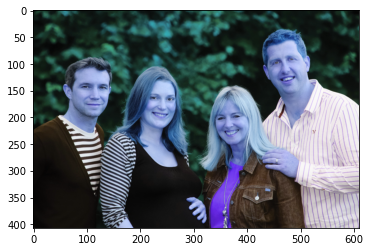

In [23]:
#problem with open cv is it is BGR instead of RGB
#color is reversed
plt.imshow(frame)

In [24]:
#cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#Use the function cv2.imshow() to display an image in a window. The window automatically fits to the image size.

In [25]:
#cvtColor:  to convert images from one color-space to another, like BGR to Gray, BGR to HSV etc.
rgb=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

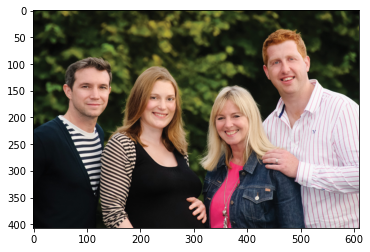

In [26]:
plt.imshow(rgb)

In [27]:
#OpenCV already contains many pre-trained classifiers for face, eyes, sm\ile etc. 
#Those XML files are stored in opencv/data/haarcascades/ folder
classifier=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
classifierEye=cv2.CascadeClassifier("haarcascade_eye.xml")

In [28]:
#Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.
faces=classifier.detectMultiScale(frame)
eyes=classifierEye.detectMultiScale(frame)

In [29]:
faces
#so from output we see, it detects 5 rectangles i.e 5 faces.

array([[ 75, 112,  82,  82],
       [180,  93,  94,  94],
       [205, 137,  74,  74],
       [430,  60,  89,  89],
       [330, 170,  77,  77]], dtype=int32)

In [30]:
eyes

array([[ 86, 131,  24,  24],
       [118, 133,  22,  22],
       [217, 153,  22,  22],
       [244, 155,  22,  22],
       [471,  79,  22,  22],
       [443,  87,  23,  23],
       [366, 186,  22,  22],
       [341, 190,  22,  22]], dtype=int32)

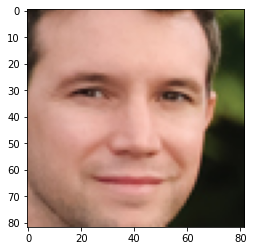

In [31]:
#take first face
faceszero=faces[0]
#x->,y starting upper left corner, w is width->, h is height
x, y, w, h = faceszero
face = rgb[y:y+h, x:x+w]
plt.imshow(face)

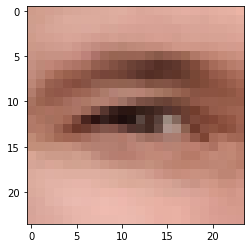

In [32]:
eyeszero=eyes[0]
ex,ey,ew,eh = eyeszero
eye=rgb[ey:ey+eh,ex:ex+ew]
plt.imshow(eye)

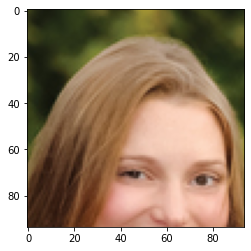

In [33]:
faceszero=faces[1]
x, y, w, h = faceszero
face = rgb[y:y+h, x:x+w]
plt.imshow(face)

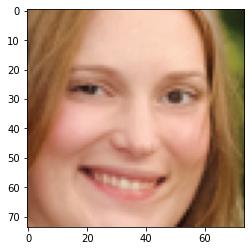

In [34]:
faceszero=faces[2]
x, y, w, h = faceszero
face = rgb[y:y+h, x:x+w]
plt.imshow(face)

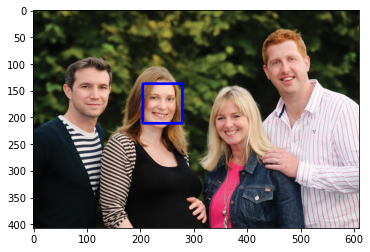

In [35]:
#will draw rectangle on face region
#rgb: image, (x,y): starting point (x+w,y+h): ending point (0,0,255): color of box. in terms of rgb, 4: thickness)
#color of box is in terms of rgb and not bgr because we used cvtColor above to convert to RGB
output=cv2.rectangle(rgb,(x,y),(x+w,y+h),(0,0,255),4)
plt.imshow(output)

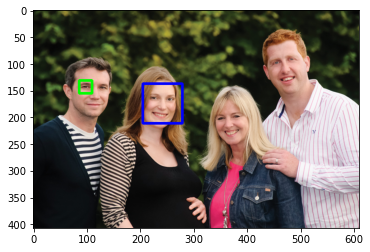

In [36]:
outputeyes=cv2.rectangle(rgb,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)
plt.imshow(outputeyes)

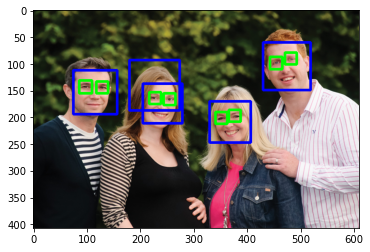

In [37]:
for(x,y,w,h) in faces:
    plt.imshow(cv2.rectangle(rgb,(x,y),(x+w,y+h),(0,0,255),4))
    for(ex,ey,ew,eh) in eyes:
        plt.imshow(cv2.rectangle(rgb,(ex,ey),(ex+ew,ey+eh),(0,255,0),4))